In [2]:

import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from scipy import optimize

# Figure 5.1 and 5.2 

In [90]:
with open("sprint250.txt") as f:
    data = f.readlines()
    data = np.array([eval(x.strip()) for x in data])

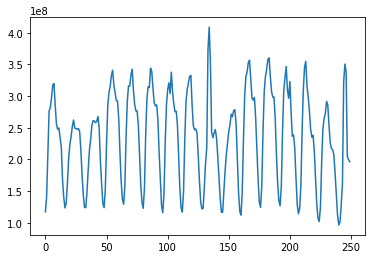

In [91]:
plt.plot(data);

In [92]:
x_range = np.arange(250)
X = np.array([np.ones(len(x_range)),
              x_range,
              x_range**2,
              np.cos(x_range*np.pi/8),
              np.sin(x_range*np.pi/8),
              np.cos(x_range*np.pi/4),
              np.sin(x_range*np.pi/4)]).T
K = np.linalg.inv(X.T.dot(X)).dot(X.T)
beta = K.dot(data)

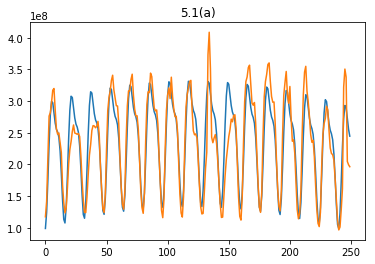

In [93]:
plt.plot(x_range, X.dot(beta))
plt.plot(data)
plt.title("5.1(a)");

In [94]:
residuals = data-X.dot(beta)
s_2 = 1/(250-3) * np.sum(residuals**2)
sig = np.sqrt(s_2)

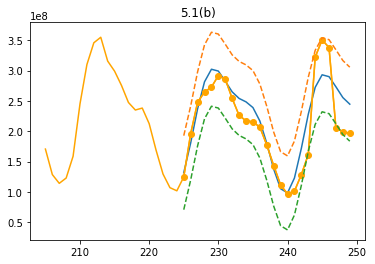

In [95]:
x_1 = np.arange(205, 225)
x_2 = np.arange(225, 250)
x = np.arange(205, 250)
plt.plot(x_2, X[225:250].dot(beta)) # blue == predict
plt.plot(x_2, data[225:], 'o-', c='orange') # == orange dotter
plt.plot(x, data[205:], c='orange'); # == orange flat

plt.plot(x_2, X[225:250].dot(beta)+1.96*sig, '--')
plt.plot(x_2, X[225:250].dot(beta)-1.96*sig, '--')
plt.title("5.1(b)");

# FIGURE 5.7 (a)-(c)

In [44]:
known_ids = range(225)
def delta(y, s):
    ret = np.zeros_like(y)
    for i, val in enumerate(y):
        if i < s:
            ret[i] = val
        else:
            ret[i] = val - y[i-s]
    return ret[s:]

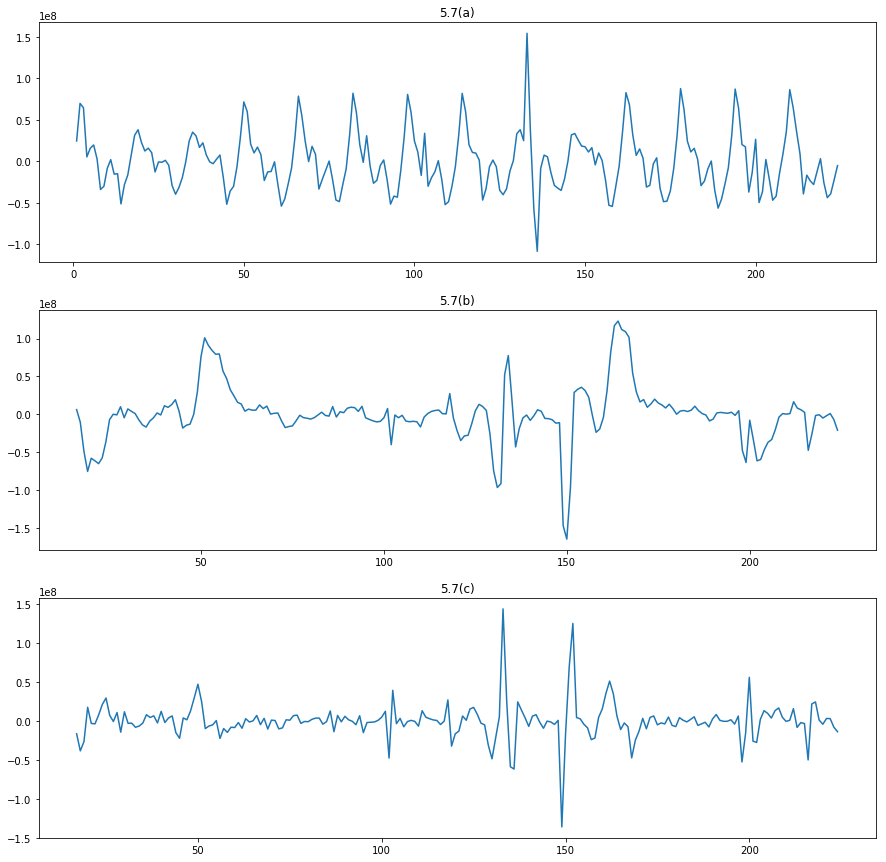

In [58]:
plt.figure(figsize=(15,15))

plt.subplot(3,1,1)
plt.title('5.7(a)')
plt.plot(known_ids[1:], delta(data[known_ids], 1));

plt.subplot(3,1,2)
plt.title('5.7(b)')
plt.plot(known_ids[16:], delta(data[known_ids], 16));

plt.subplot(3,1,3)
plt.title('5.7(c)')
plt.plot(known_ids[17:], delta(delta(data[known_ids], 1), 16));

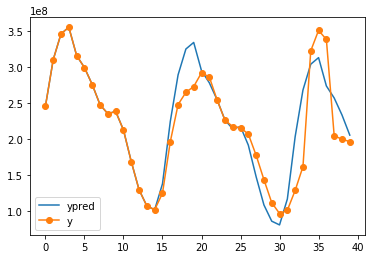

In [99]:
yfore = np.copy(data)
for i in range(225, 250):
    yfore[i] = yfore[i-1] + yfore[i-16] - yfore[i-16-1]
plt.plot(yfore[210:], label="ypred")
plt.plot(data[210:], 'o-', label="y")
plt.legend()